In [17]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [22]:
from src.models.train.binary_classification import train
from src.models.test.test import evaluate
from src.visualization.plotting import *
from src.data.data_processing import generate_imap_dataset, generate_test_data, InteractionMapMode

# TRB CDR3

In [41]:
train_folder = 'data/training_data/'
test_folder = 'data/true_set/'
model_path_trb = 'models/binary_classification_tcra_5_epochs'
trb_chain = ['TRA_CDR3', 'TRB_CDR3']
df_b, shape_b = generate_imap_dataset(train_folder, trb_chain, InteractionMapMode.MERGE_DIMENSIONAL)
print(shape_b)

(2, 23, 10, 4)


In [44]:
history = train(
    imap_df=df_b,
    model_path=model_path_trb,
    imap_shape=shape_b,
    epochs=5,
)

Epoch 1/5
368/368 [==============================] - 239s 645ms/step - loss: 1.8158 - accuracy: 0.8219 - roc_auc: 0.5110 - precision: 0.1200 - recall: 0.0091 - val_loss: 0.5040 - val_accuracy: 0.8419 - val_roc_auc: 0.4867 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 2/5
368/368 [==============================] - 237s 644ms/step - loss: 0.5338 - accuracy: 0.8259 - roc_auc: 0.5030 - precision: 0.1149 - recall: 0.0051 - val_loss: 0.4800 - val_accuracy: 0.8419 - val_roc_auc: 0.4907 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 3/5
368/368 [==============================] - 237s 643ms/step - loss: 0.5546 - accuracy: 0.8283 - roc_auc: 0.5089 - precision: 0.1803 - recall: 0.0056 - val_loss: 0.4923 - val_accuracy: 0.8419 - val_roc_auc: 0.5024 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 4/5
368/368 [==============================] - 279s 759ms/step - loss: 0.5456 - accuracy: 0.8291 - roc_auc: 0.5125 - precision: 0.1591 - recall: 0.0035 - val_loss: 0.503

INFO:tensorflow:Assets written to: models/binary_classification_tcra_5_epochs\assets


In [47]:
test_data_b = generate_test_data(test_folder, trb_chain, InteractionMapMode.MERGE_DIMENSIONAL, shape_b)

auc_scores = evaluate(
    model_path_trb,
    test_data_b
)

shape (2, 23, 10, 4)
5/5 [==============================] - 1s 90ms/step
shape (2, 23, 10, 4)
9/9 [==============================] - 1s 68ms/step
shape (2, 23, 10, 4)
26/26 [==============================] - 2s 85ms/step
shape (2, 23, 10, 4)
7/7 [==============================] - 1s 81ms/step
shape (2, 23, 10, 4)
2/2 [==============================] - 0s 106ms/step
shape (2, 23, 10, 4)
3/3 [==============================] - 0s 52ms/step
shape (2, 23, 10, 4)
5/5 [==============================] - 1s 107ms/step
shape (2, 23, 10, 4)
9/9 [==============================] - 1s 70ms/step
shape (2, 23, 10, 4)
5/5 [==============================] - 0s 64ms/step
shape (2, 23, 10, 4)
13/13 [==============================] - 1s 80ms/step
shape (2, 23, 10, 4)
3/3 [==============================] - 0s 64ms/step
shape (2, 23, 10, 4)
3/3 [==============================] - 0s 40ms/step
shape (2, 23, 10, 4)
2/2 [==============================] - 0s 54ms/step
shape (2, 23, 10, 4)
5/5 [===================

In [31]:
print(sum(auc_scores.values()) / len(auc_scores))

0.6032368924021785


# TRA CDR3

In [10]:
model_path_tra = 'temp_models/binary_classification_tra_20epochs'
tra_chain = ['TRA_CDR3']
df_a, shape_a = generate_imap_dataset(train_folder, tra_chain, InteractionMapMode.SINGLE)

In [29]:
history_tra = train(
    imap_df=df_a,
    imap_shape=shape_a,
    model_path=model_path_tra,
    epochs=20,
)

Epoch 1/20
368/368 [==============================] - 27s 69ms/step - loss: 2.8203 - accuracy: 0.8307 - roc_auc: 0.5831 - precision: 0.4724 - recall: 0.0475 - val_loss: 0.7009 - val_accuracy: 0.8419 - val_roc_auc: 0.5540 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 2/20
368/368 [==============================] - 27s 72ms/step - loss: 0.5645 - accuracy: 0.8387 - roc_auc: 0.6117 - precision: 0.6797 - recall: 0.0793 - val_loss: 0.6329 - val_accuracy: 0.8419 - val_roc_auc: 0.5610 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 3/20
368/368 [==============================] - 27s 73ms/step - loss: 0.5137 - accuracy: 0.8397 - roc_auc: 0.6361 - precision: 0.6877 - recall: 0.0879 - val_loss: 0.4992 - val_accuracy: 0.8477 - val_roc_auc: 0.6443 - val_precision: 0.9048 - val_recall: 0.0409
Epoch 4/20
368/368 [==============================] - 26s 71ms/step - loss: 0.5020 - accuracy: 0.8423 - roc_auc: 0.6580 - precision: 0.6844 - recall: 0.1172 - val_loss: 0.5003 - val_accu

INFO:tensorflow:Assets written to: temp_models/binary_classification_tra_20epochs\assets


In [11]:
test_data_a = generate_test_data(test_folder, tra_chain, InteractionMapMode.SINGLE, shape_a)

auc_scores = evaluate(
    model_path_tra,
    test_data_a
)

IndexError: list index out of range

In [7]:
print(sum(auc_scores.values()) / len(auc_scores))

0.6860282565987235


# TRA and TRB concatenated

In [8]:
model_path_trab = 'temp_models/binary_classification_trab_20epochs'
trab_chains = ['TRA_CDR3', 'TRB_CDR3']
df_ab, shape_ab = generate_imap_dataset(train_folder,trab_chains, InteractionMapMode.CONCATENATE)

In [5]:
shape_ab

(38, 10, 4)

In [6]:
history_trab = train(
    imap_df=df_ab,
    imap_shape=shape_ab,
    model_path=model_path_trab,
    epochs=20,
)

Epoch 1/20
368/368 [==============================] - 45s 116ms/step - loss: 3.1152 - accuracy: 0.8338 - roc_auc: 0.5900 - precision: 0.5472 - recall: 0.0732 - val_loss: 0.8073 - val_accuracy: 0.8419 - val_roc_auc: 0.5501 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 2/20
368/368 [==============================] - 48s 129ms/step - loss: 0.6046 - accuracy: 0.8418 - roc_auc: 0.6383 - precision: 0.6809 - recall: 0.1131 - val_loss: 0.5419 - val_accuracy: 0.8433 - val_roc_auc: 0.6538 - val_precision: 1.0000 - val_recall: 0.0086
Epoch 3/20
368/368 [==============================] - 44s 120ms/step - loss: 0.5246 - accuracy: 0.8436 - roc_auc: 0.6620 - precision: 0.6794 - recall: 0.1348 - val_loss: 0.5069 - val_accuracy: 0.8463 - val_roc_auc: 0.6637 - val_precision: 0.9333 - val_recall: 0.0301
Epoch 4/20
368/368 [==============================] - 52s 141ms/step - loss: 0.5129 - accuracy: 0.8434 - roc_auc: 0.6621 - precision: 0.6760 - recall: 0.1338 - val_loss: 0.5080 - val_accuracy

INFO:tensorflow:Assets written to: temp_models/binary_classification_trab_20epochs\assets


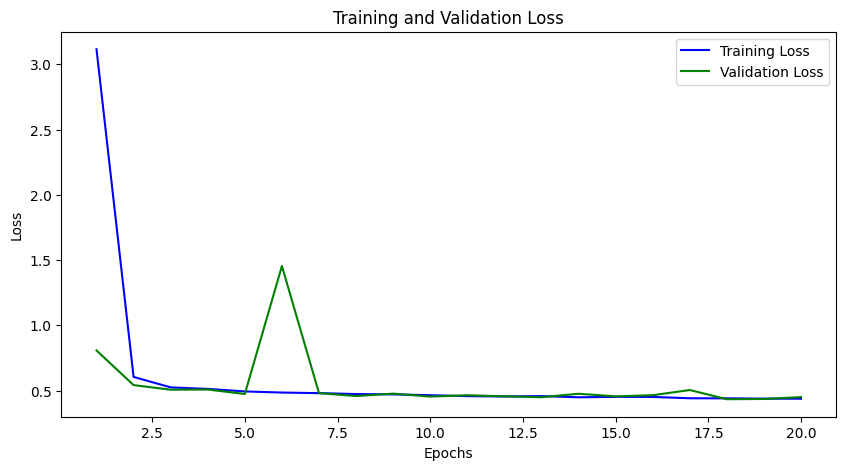

In [7]:
plot_loss(history_trab)

C:\Users\moham\Desktop\Internship\ImmuneSystemDM\src\visualization\plotting.py:25: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b" (-> color=(0.0, 0.0, 1.0, 1)). The keyword argument will take precedence.
  plt.plot(epochs, history.history['accuracy'], 'b', label='Accuracy', color='blue')
C:\Users\moham\Desktop\Internship\ImmuneSystemDM\src\visualization\plotting.py:27: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b" (-> color=(0.0, 0.0, 1.0, 1)). The keyword argument will take precedence.
  plt.plot(epochs, history.history['val_accuracy'], 'b', label='Validation Accuracy', color='cyan',
C:\Users\moham\Desktop\Internship\ImmuneSystemDM\src\visualization\plotting.py:30: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b" (-> color=(0.0, 0.0, 1.0, 1)). The keyword argument will take precedence.
  plt.plot(epochs, history.history['roc_auc'], 'b', l

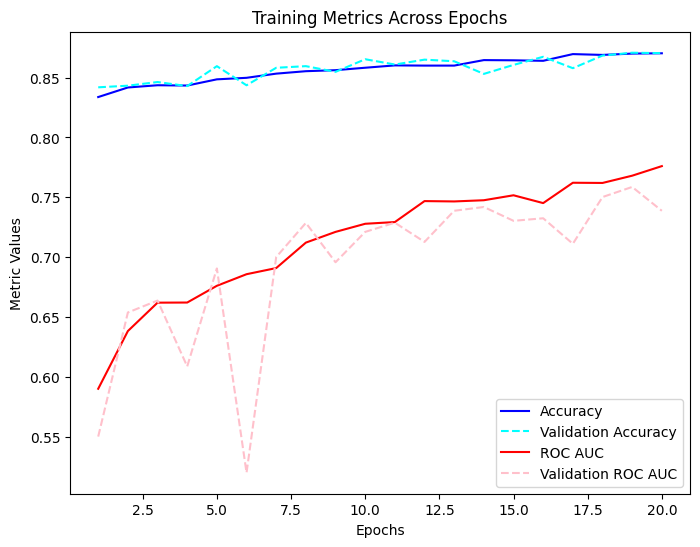

In [8]:
plot_metrics(history_trab)

In [9]:
test_data_ab = generate_test_data(test_folder, trab_chains, InteractionMapMode.CONCATENATE, shape_ab)

auc_scores = evaluate(
    model_path_trab,
    test_data_ab
)

shape (38, 10, 4)
5/5 [==============================] - 0s 25ms/step
shape (38, 10, 4)
9/9 [==============================] - 0s 19ms/step
shape (38, 10, 4)
26/26 [==============================] - 1s 24ms/step
shape (38, 10, 4)
7/7 [==============================] - 0s 21ms/step
shape (38, 10, 4)
2/2 [==============================] - 0s 27ms/step
shape (38, 10, 4)
3/3 [==============================] - 0s 12ms/step
shape (38, 10, 4)
5/5 [==============================] - 0s 16ms/step
shape (38, 10, 4)
9/9 [==============================] - 0s 19ms/step
shape (38, 10, 4)
5/5 [==============================] - 0s 21ms/step
shape (38, 10, 4)
13/13 [==============================] - 0s 24ms/step
shape (38, 10, 4)
3/3 [==============================] - 0s 16ms/step
shape (38, 10, 4)
3/3 [==============================] - 0s 16ms/step
shape (38, 10, 4)
2/2 [==============================] - 0s 18ms/step
shape (38, 10, 4)
5/5 [==============================] - 0s 22ms/step
shape (38, 10, 4

In [10]:
print(sum(auc_scores.values()) / len(auc_scores))

0.6996241948138081


# Train on TRB, test on TRA

In [14]:
test_data_b2 = generate_test_data(test_folder, trb_chain, InteractionMapMode.SINGLE, shape_a)
auc_scores = evaluate(
    model_path_tra,
    test_data_b2
)

shape (23, 10, 4)
5/5 [==============================] - 0s 23ms/step
shape (23, 10, 4)
9/9 [==============================] - 0s 13ms/step
shape (23, 10, 4)
26/26 [==============================] - 0s 15ms/step
shape (23, 10, 4)
7/7 [==============================] - 0s 16ms/step
shape (23, 10, 4)
2/2 [==============================] - 0s 15ms/step
shape (23, 10, 4)
3/3 [==============================] - 0s 11ms/step
shape (23, 10, 4)
5/5 [==============================] - 0s 14ms/step
shape (23, 10, 4)
9/9 [==============================] - 0s 13ms/step
shape (23, 10, 4)
5/5 [==============================] - 0s 17ms/step
shape (23, 10, 4)
13/13 [==============================] - 0s 13ms/step
shape (23, 10, 4)
3/3 [==============================] - 0s 12ms/step
shape (23, 10, 4)
3/3 [==============================] - 0s 14ms/step
shape (23, 10, 4)
2/2 [==============================] - 0s 17ms/step
shape (23, 10, 4)
5/5 [==============================] - 0s 12ms/step
shape (23, 10, 4

In [15]:
print(sum(auc_scores.values()) / len(auc_scores))

0.5353827930171998


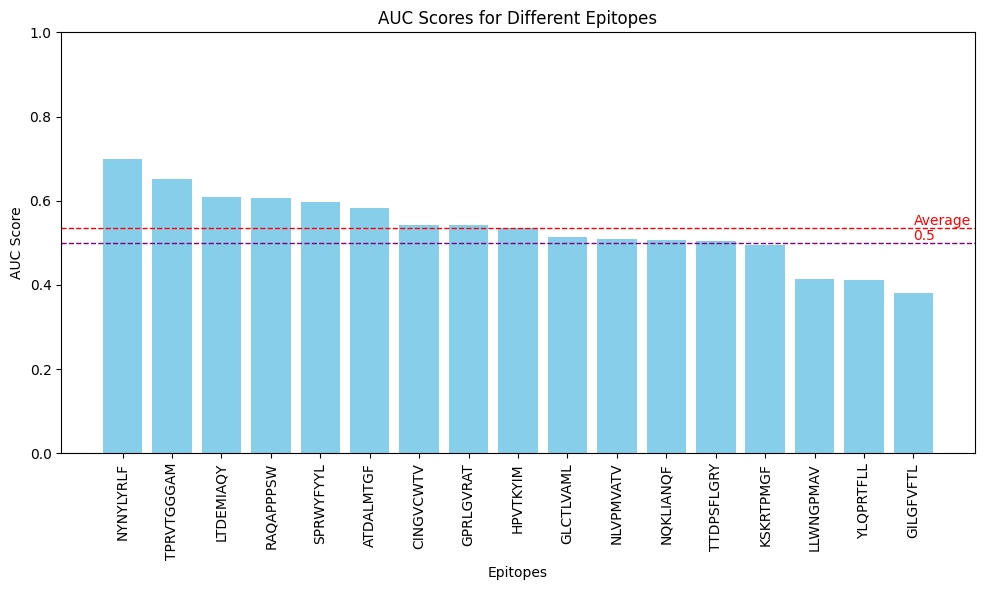

In [16]:
plot_auc(auc_scores)

# Combine TRA and TRB imaps into 8 channel imap

In [27]:
model_path_trab_combine = 'temp_models/binary_classification_trab_combine_20epochs'
trab_chains_combine = ['TRA_CDR3', 'TRB_CDR3']
df_ab_combine, shape_ab_combine = generate_imap_dataset(train_folder,trab_chains, InteractionMapMode.COMBINE)

In [20]:
history_trab_combine = train(
    imap_df=df_ab_combine,
    imap_shape=shape_ab_combine,
    model_path=model_path_trab_combine,
    epochs=20,
)

Epoch 1/20
368/368 [==============================] - 28s 70ms/step - loss: 2.6359 - accuracy: 0.8327 - roc_auc: 0.5880 - precision: 0.5361 - recall: 0.0449 - val_loss: 0.6958 - val_accuracy: 0.8419 - val_roc_auc: 0.5973 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 2/20
368/368 [==============================] - 27s 74ms/step - loss: 0.5806 - accuracy: 0.8445 - roc_auc: 0.6367 - precision: 0.6883 - recall: 0.1394 - val_loss: 0.5418 - val_accuracy: 0.8599 - val_roc_auc: 0.6614 - val_precision: 0.8732 - val_recall: 0.1333
Epoch 3/20
368/368 [==============================] - 25s 69ms/step - loss: 0.5165 - accuracy: 0.8532 - roc_auc: 0.6728 - precision: 0.7860 - recall: 0.1763 - val_loss: 0.6120 - val_accuracy: 0.8426 - val_roc_auc: 0.6356 - val_precision: 1.0000 - val_recall: 0.0043
Epoch 4/20
368/368 [==============================] - 26s 70ms/step - loss: 0.5039 - accuracy: 0.8578 - roc_auc: 0.6938 - precision: 0.8008 - recall: 0.2071 - val_loss: 0.4981 - val_accuracy: 0.

INFO:tensorflow:Assets written to: temp_models/binary_classification_trab_combine_20epochs\assets


In [29]:
test_data_ab_combine = generate_test_data(test_folder, trab_chains, InteractionMapMode.COMBINE, shape_ab_combine)

auc_scores = evaluate(
    model_path_trab_combine,
    test_data_ab_combine
)

IndexError: list index out of range

In [ ]:
print(sum(auc_scores.values()) / len(auc_scores))

In [ ]:
from tensorflow.python.client import device_lib

def get_available_devices():
    local_device_protos = device_lib.list_local_devices()
    return [x.name for x in local_device_protos]

print(get_available_devices())